# Visualizing Earnings Based on College Majors

在本课程中，我们一直在直接使用pyplot和matplotlib创建图。当我们想通过快速创建可视化文件来探索新的数据集时，直接使用这些工具可能会很麻烦。值得庆幸的是，pandas有许多方法可以根据DataFrames中的数据快速生成通用图。与pyplot一样，pandas中的绘图功能也是matplotlib的包装。这意味着我们可以在必要时通过访问基础的Figure，Axes和其他matplotlib对象来自定义图。

本项目中，我们将使用有关2010年至2012年间大学毕业生的工作成果的数据集。其每一行代表一个专业，并包含一些诸如性别多样性、就业率、薪资中位数等的信息。

- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
 + Using scatter plots
- How many majors are predominantly male? Predominantly female?
 + Using histograms
- Which category of majors have the most students?
 + Using bar plots

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [172]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [173]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [174]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,MISCELLANEOUS ENGINEERING TECHNOLOGIES,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


In [175]:
raw_data_count = len(recent_grads)
raw_data_count

173

In [176]:
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

## Pandas, Scatter Plots

pandas中的大多数绘图功能都包含在[DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)方法中。调用此方法时，我们指定要绘制的数据以及绘制的类型。我们使用`kind`参数指定所需的绘图类型。我们使用`x`和`y`来指定每个轴上所需的数据。

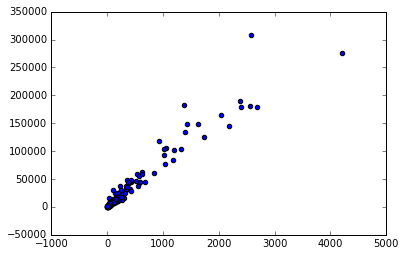

In [177]:
fig, ax = plt.subplots()
ax.scatter(recent_grads['Sample_size'], recent_grads['Employed'])

用`DataFrame.plot()`画同样的图：

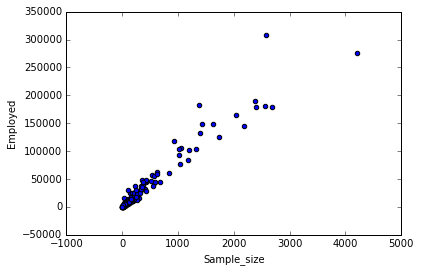

In [178]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

`Dataframe.plot()`的一些其它参数：

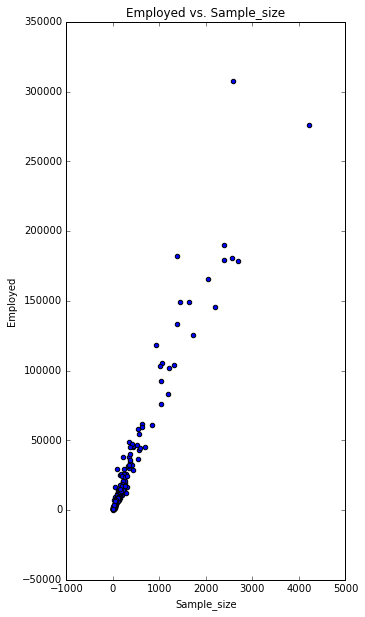

In [179]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter', 
                  title='Employed vs. Sample_size', figsize=(5,10))

我们可以通过将返回值分配给变量，来访问matplotlib的Axes对象

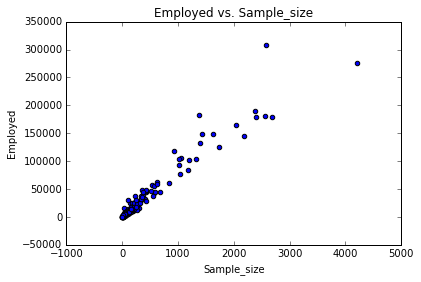

In [180]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

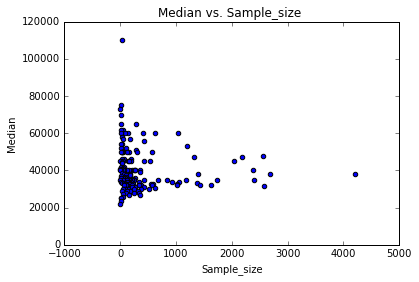

In [181]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Median vs. Sample_size ')

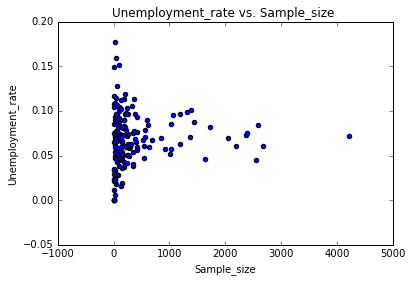

In [182]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', 
                  title='Unemployment_rate vs. Sample_size ')

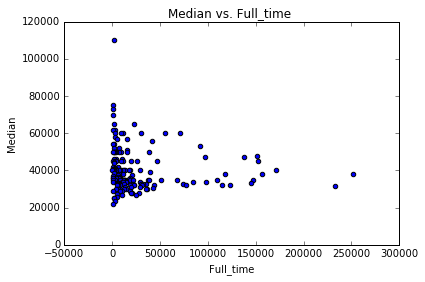

In [183]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Median vs. Full_time ')

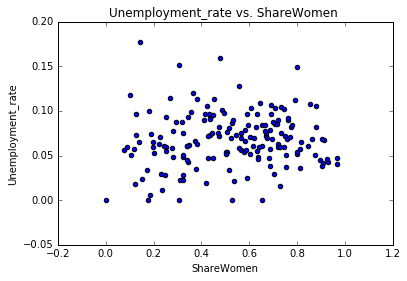

In [184]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', 
                  title='Unemployment_rate vs. ShareWomen ')

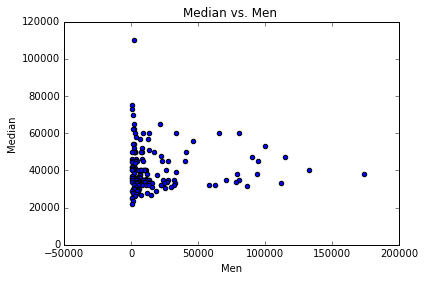

In [185]:
recent_grads.plot(x='Men', y='Median', kind='scatter', 
                  title='Median vs. Men ')

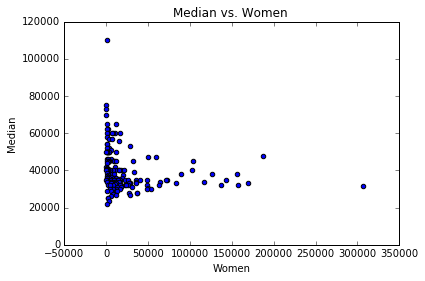

In [186]:
recent_grads.plot(x='Women', y='Median', kind='scatter', 
                  title='Median vs. Women ')

## Pandas, Histograms

想要探索某一列的分布，可以用[Series.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)，并设置`kind`为`hist`

`DataFrame.plot()`和`Series.plot()`有很多相同的参数，但是`Series.plot()`用于绘制特定列，`DataFrame.plot()`用于生成多个列的图。例如散点图是用两组值生成的，我们就不能用`Series.plot()`绘制散点图

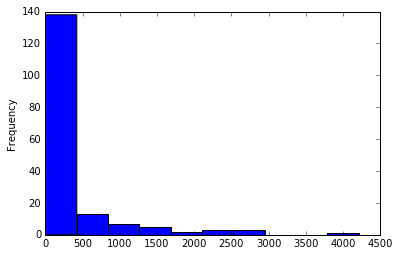

In [187]:
recent_grads['Sample_size'].plot(kind='hist')

查看文档可以发现，我们不能在`Series.plot()`里更改bin的设置。

幸运的是，我们可以用[Series.hist()](https://app.dataquest.io/m/146/guided-project%3A-visualizing-earnings-based-on-college-majors/3/pandas-histograms)设置：

另外：`Series.hist()`会忽略控制，而`pyplot.hist()`遇到控制会报错：ValueError: max must be larger than min in range parameter.

同样的区别应该适用于`Series.plot()``pyplot.plot()`，未实验

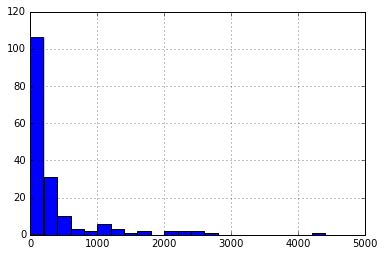

In [188]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))

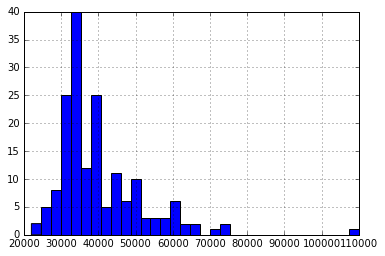

In [189]:
recent_grads['Median'].hist(bins=33)

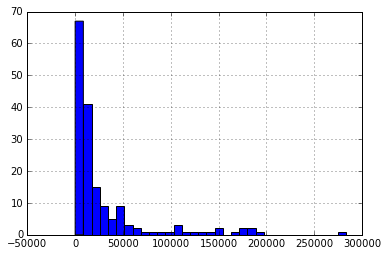

In [190]:
recent_grads['Employed'].hist(bins=35, range=(-10,300000))

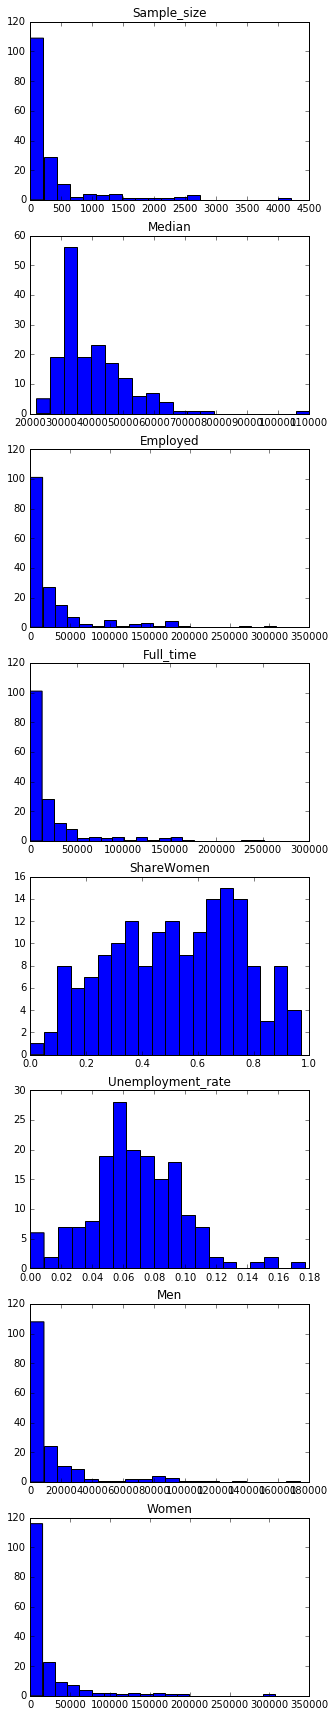

In [191]:
fig = plt.figure(figsize=(5,30))
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 
       'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
n = 1
for col in cols:
    ax = fig.add_subplot(len(cols),1,n)
    ax.hist(recent_grads[col], bins=20)
    ax.set_title(col)
    n += 1
plt.show()

## Pandas, Scatter Matrix Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd102f24cc0>,
      dtype=object)

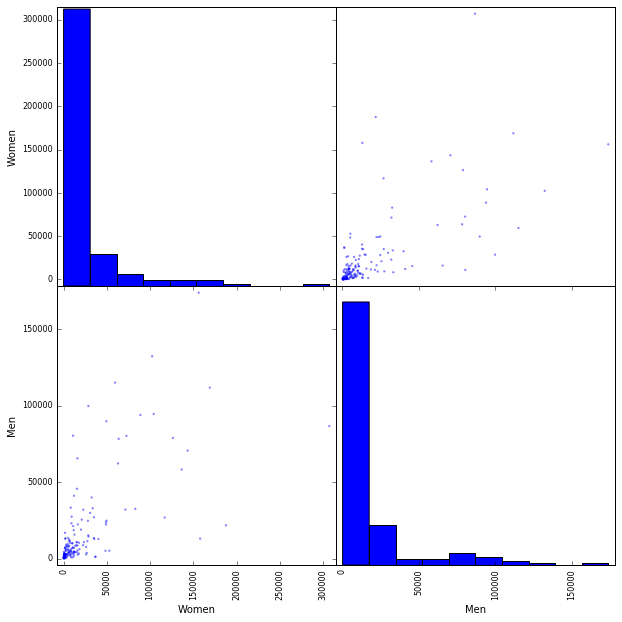

In [192]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))
#不推荐使用pandas.scatter_matrix，建议使用pandas.plotting.scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd102e61b38>,
      dtype=object)

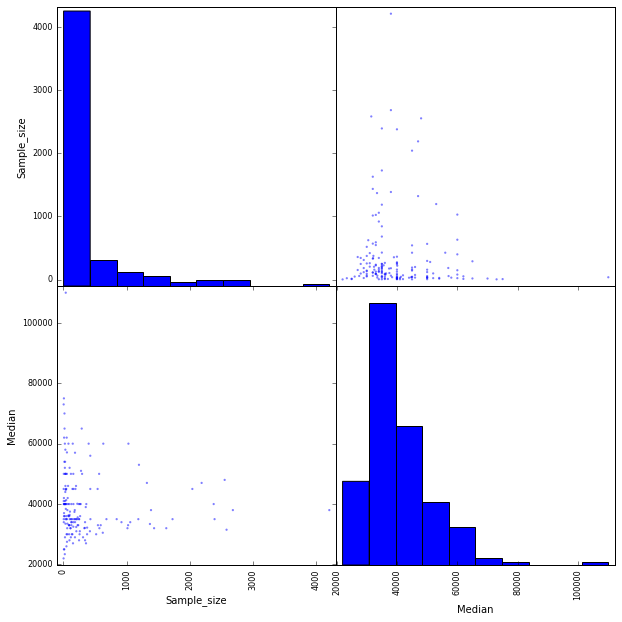

In [193]:
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd10cfc0780>,
      dtype=object)

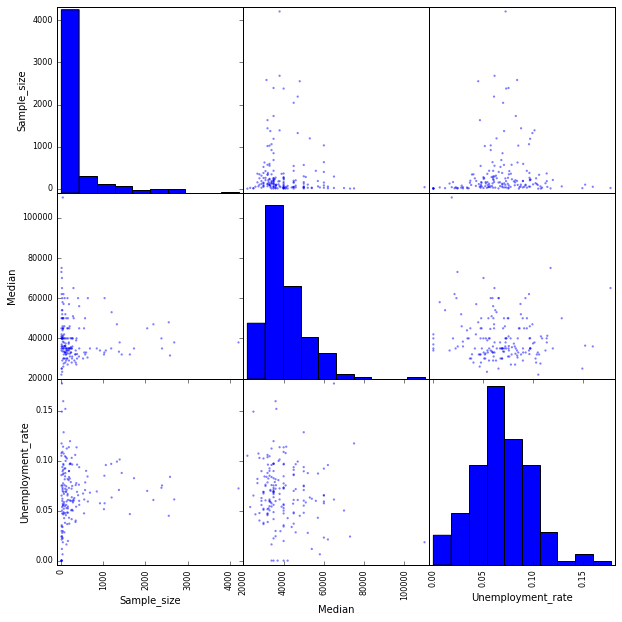

In [194]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], figsize=(10,10))

## Pandas, Bar Plots

要在 matplotlib 中绘制条形图，我们必须自己指定bar的许多方面，如位置、标签、长度和宽度。在使用pandas创建条形图时，我们只需要指定我们希望条形图表示的数据和每个条形的标签。下列代码返回`Women`列中前 5 个值的条形图：

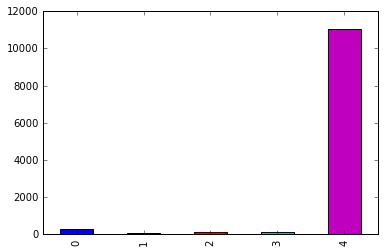

In [195]:
recent_grads[:5]['Women'].plot(kind='bar')

默认情况下, pandas使用数字作为x轴标签。

使用[DataFrame.plot.bar()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)方法，用参数`x`制定标签，用参数`y`制定数据

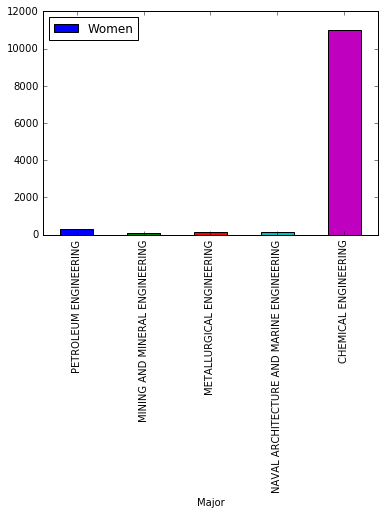

In [196]:
recent_grads[:5].plot.bar(x='Major', y='Women')

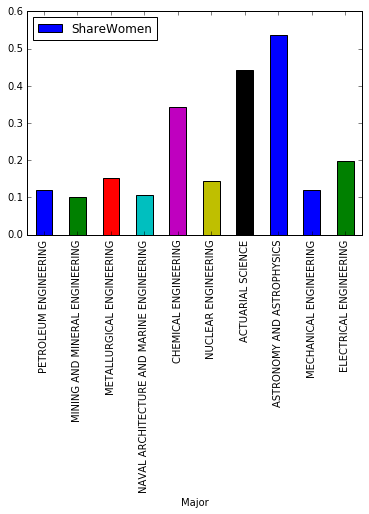

In [197]:
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')

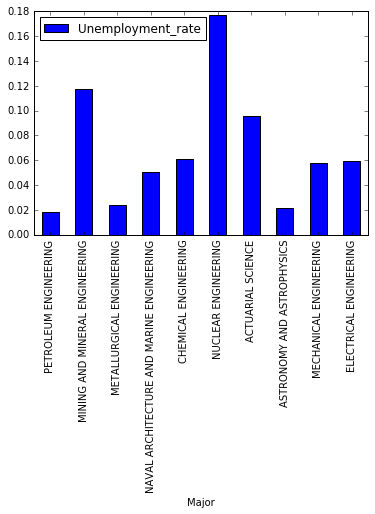

In [198]:
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', color='blue')

Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

In [202]:
category = recent_grads['Major_category'].unique()

In [203]:
category

array(['Engineering', 'Business', 'Physical Sciences',
       'Law & Public Policy', 'Computers & Mathematics',
       'Industrial Arts & Consumer Services', 'Arts', 'Health',
       'Social Science', 'Biology & Life Science', 'Education',
       'Agriculture & Natural Resources', 'Humanities & Liberal Arts',
       'Psychology & Social Work', 'Communications & Journalism',
       'Interdisciplinary'], dtype=object)

In [204]:
category_w = {}
category_m = {}

for c in category:
    rows = recent_grads[recent_grads['Major_category']==c]
    num_w = rows['Women'].sum()
    num_m = rows['Men'].sum()
    category_w[c] = num_w
    category_m[c] = num_m
    


In [211]:
category_w = pd.Series(category_w)
category_sex = pd.DataFrame(category_w, columns=['Women'])
category_m = pd.Series(category_m)
category_sex['Men'] = category_m

In [212]:
category_sex

,Women,Men
Agriculture & Natural Resources,35263.0,40357.0
Arts,222740.0,134390.0
Biology & Life Science,268943.0,184919.0
Business,634524.0,667852.0
Communications & Journalism,260680.0,131921.0
Computers & Mathematics,90283.0,208725.0
Education,455603.0,103526.0
Engineering,129276.0,408307.0
Health,387713.0,75517.0
Humanities & Liberal Arts,440622.0,272846.0


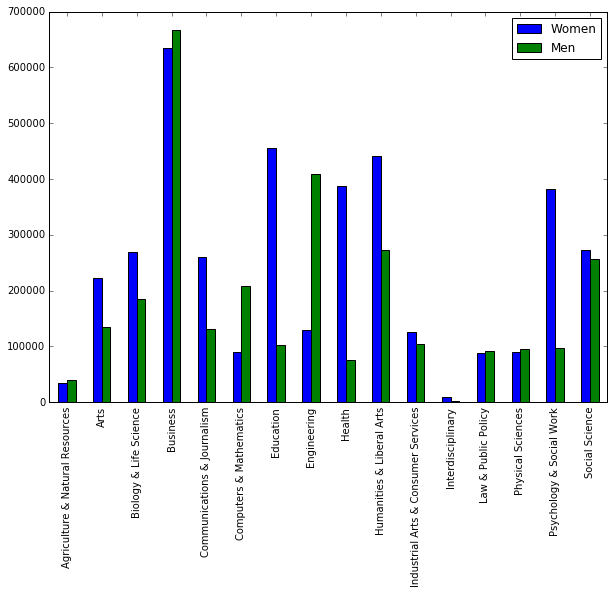

In [215]:
category_sex.plot.bar(figsize=(10,7))

方法二，用`dataframe.groupby()`方法

In [216]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum')

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


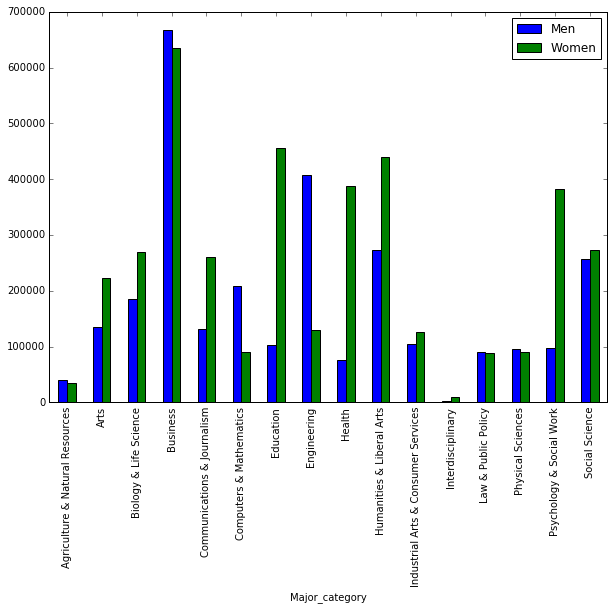

In [217]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(10,7))